In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn


In [4]:
import pandas as pd

# Load the 2021, 2022, and 2023 datasets
shots_2021 = pd.read_csv("NBA_2021_Shots.csv")
shots_2022 = pd.read_csv("NBA_2022_Shots.csv")
shots_2023 = pd.read_csv("NBA_2023_Shots.csv")

# Combine the datasets into one DataFrame
data = pd.concat([shots_2021, shots_2022, shots_2023], ignore_index=True)

# Check how many records are in the combined DataFrame
print("Number of records in the combined dataset:", len(data))



Number of records in the combined dataset: 624925


In [5]:
import pandas as pd

# Load the dataset

# Drop all instances of the Backcourt shots
data = data[data['ZONE_NAME'] != 'Back Court']

# Display the shape of the cleaned dataset
print("Cleaned Data Shape (after dropping Backcourt shots):", data.shape)


Cleaned Data Shape (after dropping Backcourt shots): (623651, 26)


In [6]:
# Group the data by BASIC_ZONE and ZONE_NAME to calculate league-wide averages
league_avg = data.groupby(['BASIC_ZONE', 'ZONE_NAME']).agg(
    Shots_Made=('SHOT_MADE', lambda x: x.sum()),       # Sum for shots made
    Shots_Attempted=('SHOT_MADE', 'count')            # Count for shot attempts
).reset_index()

# Calculate efficiency for each zone (Shots_Made / Shots_Attempted)
league_avg['Efficiency'] = league_avg['Shots_Made'] / league_avg['Shots_Attempted']

# Display the league averages
print(league_avg)


               BASIC_ZONE          ZONE_NAME  Shots_Made  Shots_Attempted  \
0       Above the Break 3             Center       16090            46470   
1       Above the Break 3   Left Side Center       25225            71067   
2       Above the Break 3  Right Side Center       23638            66234   
3   In The Paint (Non-RA)             Center       44720           103180   
4   In The Paint (Non-RA)          Left Side        2711             6268   
5   In The Paint (Non-RA)         Right Side        3002             6885   
6           Left Corner 3          Left Side       12276            31614   
7               Mid-Range             Center        7716            18027   
8               Mid-Range          Left Side        7597            18726   
9               Mid-Range   Left Side Center        4384            10809   
10              Mid-Range         Right Side        7885            18999   
11              Mid-Range  Right Side Center        4698            11472   

In [7]:
# Filter the dataset for Atlanta Hawks
hawks_data = data[data['TEAM_NAME'] == 'Atlanta Hawks']

# Group the data by BASIC_ZONE and ZONE_NAME to calculate Hawks' averages
hawks_avg = hawks_data.groupby(['BASIC_ZONE', 'ZONE_NAME']).agg(
    Shots_Made=('SHOT_MADE', lambda x: x.sum()),       # Sum for shots made
    Shots_Attempted=('SHOT_MADE', 'count')            # Count for shot attempts
).reset_index()

# Calculate efficiency for each zone (Shots_Made / Shots_Attempted)
hawks_avg['Efficiency'] = hawks_avg['Shots_Made'] / hawks_avg['Shots_Attempted']

# Display Hawks' averages
print(hawks_avg)


               BASIC_ZONE          ZONE_NAME  Shots_Made  Shots_Attempted  \
0       Above the Break 3             Center         587             1630   
1       Above the Break 3   Left Side Center         819             2232   
2       Above the Break 3  Right Side Center         681             1937   
3   In The Paint (Non-RA)             Center        1706             3846   
4   In The Paint (Non-RA)          Left Side          80              177   
5   In The Paint (Non-RA)         Right Side          87              220   
6           Left Corner 3          Left Side         385              928   
7               Mid-Range             Center         362              781   
8               Mid-Range          Left Side         314              710   
9               Mid-Range   Left Side Center         166              405   
10              Mid-Range         Right Side         311              695   
11              Mid-Range  Right Side Center         193              435   

In [8]:
# Merge the Hawks' data with the league average data to compare efficiency
comparison = pd.merge(hawks_avg, league_avg, on=['BASIC_ZONE', 'ZONE_NAME'], suffixes=('_Hawks', '_League'))

# Calculate the difference in efficiency
comparison['Efficiency_Diff'] = comparison['Efficiency_Hawks'] - comparison['Efficiency_League']

# Identify zones where Hawks are below league average
underperforming_zones = comparison[comparison['Efficiency_Diff'] < 0]
print("Underperforming Zones (where Hawks are below league average):")
print(underperforming_zones)


Underperforming Zones (where Hawks are below league average):
               BASIC_ZONE          ZONE_NAME  Shots_Made_Hawks  \
2       Above the Break 3  Right Side Center               681   
5   In The Paint (Non-RA)         Right Side                87   
12        Restricted Area             Center              3946   
13         Right Corner 3         Right Side               358   

    Shots_Attempted_Hawks  Efficiency_Hawks  Shots_Made_League  \
2                    1937          0.351575              23638   
5                     220          0.395455               3002   
12                   6107          0.646144             121256   
13                    959          0.373306              10973   

    Shots_Attempted_League  Efficiency_League  Efficiency_Diff  
2                    66234           0.356886        -0.005312  
5                     6885           0.436020        -0.040566  
12                  185410           0.653988        -0.007845  
13              

In [9]:
# Step: Filter for specific zones and find top 5 players by efficiency (minimum 150 shots)

# Define the specific zones to filter
specific_zones = [
    {'BASIC_ZONE': 'Above the Break 3', 'ZONE_NAME': 'Center'},
    {'BASIC_ZONE': 'In The Paint (Non-RA)', 'ZONE_NAME': 'Right Side'},
    {'BASIC_ZONE': 'Restricted Area', 'ZONE_NAME': 'Center'},
    {'BASIC_ZONE': 'Right Corner 3', 'ZONE_NAME': 'Right Side'}
]

# Initialize an empty dataframe to store top players for each zone
top_players_by_zone = pd.DataFrame()

# Loop through each specific zone
for zone in specific_zones:
    # Filter the dataset for the specific BASIC_ZONE and ZONE_NAME
    zone_players = data[(data['BASIC_ZONE'] == zone['BASIC_ZONE']) & (data['ZONE_NAME'] == zone['ZONE_NAME'])]
    
    # Group by PLAYER_NAME, BASIC_ZONE, and ZONE_NAME, calculate total shots made and attempted
    zone_players_agg = zone_players.groupby(['PLAYER_NAME', 'BASIC_ZONE', 'ZONE_NAME']).agg(
        SHOT_ATTEMPTED=('SHOT_MADE', 'count'),
        SHOT_MADE=('SHOT_MADE', lambda x: x.sum())
    ).reset_index()
    
    # Calculate efficiency for each player
    zone_players_agg['Efficiency'] = zone_players_agg['SHOT_MADE'] / zone_players_agg['SHOT_ATTEMPTED']
    
    # Filter players who have attempted at least 150 shots in the zone
    zone_players_filtered = zone_players_agg[zone_players_agg['SHOT_ATTEMPTED'] >= 150]
    
    # Sort by Efficiency in descending order and keep the top 5 players
    top_zone_players = zone_players_filtered.sort_values(by='Efficiency', ascending=False).head(5)
    
    # Append the results to the main dataframe
    top_players_by_zone = pd.concat([top_players_by_zone, top_zone_players])

# Display the top 5 most efficient players for each specific zone
print("Top 5 Most Efficient Players for Selected Zones (minimum 150 shots):")
print(top_players_by_zone[['PLAYER_NAME', 'BASIC_ZONE', 'ZONE_NAME', 'SHOT_MADE', 'SHOT_ATTEMPTED', 'Efficiency']])


Top 5 Most Efficient Players for Selected Zones (minimum 150 shots):
             PLAYER_NAME         BASIC_ZONE   ZONE_NAME  SHOT_MADE  \
49          Bobby Portis  Above the Break 3      Center         86   
165         Desmond Bane  Above the Break 3      Center        111   
27        Andrew Wiggins  Above the Break 3      Center         66   
383   Karl-Anthony Towns  Above the Break 3      Center        148   
447         Luke Kennard  Above the Break 3      Center         76   
57               Bol Bol    Restricted Area      Center        170   
615  Robert Williams III    Restricted Area      Center        511   
137       Daniel Gafford    Restricted Area      Center        603   
239       Gary Payton II    Restricted Area      Center        171   
133         Damian Jones    Restricted Area      Center        228   
607        Tobias Harris     Right Corner 3  Right Side         72   
50     Bogdan Bogdanovic     Right Corner 3  Right Side         72   
489        Nicolas Ba

In [17]:
# Step 1: Load necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Step 2: Load the data (assuming shots_2021, shots_2022, and shots_2023 are already loaded)
data = pd.concat([shots_2021, shots_2022, shots_2023])

# Step 3: Remove 'Backcourt' zone as it's irrelevant
data = data[data['ZONE_NAME'] != 'Backcourt']

# Step 4: Calculate league averages by zone (dropping the backcourt)
league_avg = data.groupby(['BASIC_ZONE', 'ZONE_NAME']).agg(
    Shots_Made=('SHOT_MADE', lambda x: sum(x == True)),
    Shots_Attempted=('SHOT_MADE', 'count')
)
league_avg['Efficiency'] = league_avg['Shots_Made'] / league_avg['Shots_Attempted']

# Step 5: Calculate Hawks' averages by zone
hawks_data = data[data['TEAM_NAME'] == 'Atlanta Hawks']
hawks_avg = hawks_data.groupby(['BASIC_ZONE', 'ZONE_NAME']).agg(
    Shots_Made_Hawks=('SHOT_MADE', lambda x: sum(x == True)),
    Shots_Attempted_Hawks=('SHOT_MADE', 'count')
)
hawks_avg['Efficiency_Hawks'] = hawks_avg['Shots_Made_Hawks'] / hawks_avg['Shots_Attempted_Hawks']

# Step 6: Merge the player data with Hawks' averages
player_avg = data.groupby(['PLAYER_NAME', 'BASIC_ZONE', 'ZONE_NAME']).agg(
    SHOT_MADE=('SHOT_MADE', lambda x: sum(x == True)),
    SHOT_ATTEMPTED=('SHOT_MADE', 'count')
)
player_avg['Efficiency'] = player_avg['SHOT_MADE'] / player_avg['SHOT_ATTEMPTED']

# Step 7: Merge player efficiency with Hawks' efficiency
merged_data = player_avg.merge(hawks_avg, on=['BASIC_ZONE', 'ZONE_NAME'], suffixes=('_Player', '_Hawks'))

# Step 8: Filter players with more than 150 shots attempted in the selected zones
merged_data = merged_data[merged_data['SHOT_ATTEMPTED'] >= 150]

# Step 9: Prepare data for modeling
# Features: Player efficiency and shots attempted; Target: Hawks' efficiency
X = merged_data[['Efficiency', 'SHOT_ATTEMPTED']]
y = merged_data['Efficiency_Hawks']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 10: Model 1 - Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Evaluate Linear Regression Model
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f'Linear Regression Mean Squared Error: {mse_linear}')

# Step 11: Model 2 - Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Evaluate Decision Tree Model
mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f'Decision Tree Mean Squared Error: {mse_tree}')

# Step 12: Model 3 - Random Forest Regressor
forest_model = RandomForestRegressor(random_state=42, n_estimators=100)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)

# Evaluate Random Forest Model
mse_forest = mean_squared_error(y_test, y_pred_forest)
print(f'Random Forest Mean Squared Error: {mse_forest}')

# Step 13: Compare the models and determine which one has the lowest MSE
model_performance = {
    'Linear Regression': mse_linear,
    'Decision Tree': mse_tree,
    'Random Forest': mse_forest
}

# Display model performance
for model, mse in model_performance.items():
    print(f'{model} MSE: {mse}')

# Conclusion: Based on the MSE values, the model with the lowest MSE is the best for evaluating player impact.



Linear Regression Mean Squared Error: 0.0025196475573289988
Decision Tree Mean Squared Error: 0.002212359326732406
Random Forest Mean Squared Error: 0.0016644300372631005
Linear Regression MSE: 0.0025196475573289988
Decision Tree MSE: 0.002212359326732406
Random Forest MSE: 0.0016644300372631005


In [18]:
# Simulate new players' performance using trained models

# Use player data from the filtered dataset (those with 150+ shots)
X_new = merged_data[['Efficiency', 'SHOT_ATTEMPTED']]  # Features for prediction

# Predict performance using Linear Regression
pred_linear = linear_model.predict(X_new)

# Predict performance using Decision Tree
pred_tree = tree_model.predict(X_new)

# Predict performance using Random Forest
pred_forest = forest_model.predict(X_new)

# Add predictions to the player data
merged_data['Predicted_Efficiency_Linear'] = pred_linear
merged_data['Predicted_Efficiency_Tree'] = pred_tree
merged_data['Predicted_Efficiency_Forest'] = pred_forest

# Display the player data with predicted efficiencies
print(merged_data[['PLAYER_NAME', 'BASIC_ZONE', 'ZONE_NAME', 'Efficiency', 'Predicted_Efficiency_Linear', 'Predicted_Efficiency_Tree', 'Predicted_Efficiency_Forest']].head())

# Rank the players based on the predicted improvements
merged_data['Improvement_Linear'] = merged_data['Predicted_Efficiency_Linear'] - merged_data['Efficiency_Hawks']
merged_data['Improvement_Tree'] = merged_data['Predicted_Efficiency_Tree'] - merged_data['Efficiency_Hawks']
merged_data['Improvement_Forest'] = merged_data['Predicted_Efficiency_Forest'] - merged_data['Efficiency_Hawks']

# Display top players based on predicted improvement (Random Forest as example)
top_players = merged_data.sort_values(by='Improvement_Forest', ascending=False)

print(top_players[['PLAYER_NAME', 'BASIC_ZONE', 'ZONE_NAME', 'Efficiency', 'Efficiency_Hawks', 'Predicted_Efficiency_Forest', 'Improvement_Forest']].head())


KeyError: "['ZONE_NAME', 'BASIC_ZONE', 'PLAYER_NAME'] not in index"

In [19]:
from sklearn.preprocessing import StandardScaler

# Step 1: Initialize the scaler
scaler = StandardScaler()
    
# Step 2: Fit and transform the features (X)
X_scaled = scaler.fit_transform(X)

# Step 3: Split the scaled data into training and test sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Re-run the models on the scaled data
# Linear Regression
linear_model.fit(X_train_scaled, y_train)
y_pred_linear_scaled = linear_model.predict(X_test_scaled)
mse_linear_scaled = mean_squared_error(y_test, y_pred_linear_scaled)
print(f'Scaled Linear Regression MSE: {mse_linear_scaled}')

# Decision Tree
tree_model.fit(X_train_scaled, y_train)
y_pred_tree_scaled = tree_model.predict(X_test_scaled)
mse_tree_scaled = mean_squared_error(y_test, y_pred_tree_scaled)
print(f'Scaled Decision Tree MSE: {mse_tree_scaled}')

# Random Forest
forest_model.fit(X_train_scaled, y_train)
y_pred_forest_scaled = forest_model.predict(X_test_scaled)
mse_forest_scaled = mean_squared_error(y_test, y_pred_forest_scaled)
print(f'Scaled Random Forest MSE: {mse_forest_scaled}')


Scaled Linear Regression MSE: 0.0025196475573289988
Scaled Decision Tree MSE: 0.0022283529223318644
Scaled Random Forest MSE: 0.0016630042868038424


In [20]:
# Step 1: Reset index of merged_data to flatten it
merged_data = merged_data.reset_index()

# Step 2: Ensure that X also has a reset index to align with merged_data
X_reset = X.reset_index(drop=True)

# Step 3: Align merged_data with X (after resetting index)
merged_data_filtered = merged_data.loc[X_reset.index]  # Ensure same rows as X after reset

# Step 4: Use the Random Forest model to predict the efficiency for the filtered data
merged_data_filtered['Predicted_Efficiency_Forest_Scaled'] = forest_model.predict(X_scaled)

# Step 5: Calculate the potential improvement each player would bring
merged_data_filtered['Improvement_Forest_Scaled'] = merged_data_filtered['Predicted_Efficiency_Forest_Scaled'] - merged_data_filtered['Efficiency_Hawks']

# Step 6: Sort the players by the highest potential improvement
top_players_forest_scaled = merged_data_filtered.sort_values(by='Improvement_Forest_Scaled', ascending=False)

# Step 7: Display the top 5 players who would bring the most improvement to the Hawks
print(top_players_forest_scaled[['PLAYER_NAME', 'BASIC_ZONE', 'ZONE_NAME', 'Efficiency', 'Efficiency_Hawks', 'Predicted_Efficiency_Forest_Scaled', 'Improvement_Forest_Scaled']].head(5))


KeyError: "['PLAYER_NAME'] not in index"

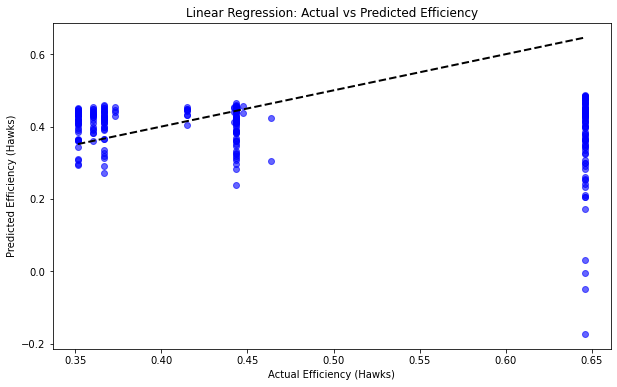

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Predict the efficiency using the Linear Regression model on test data
y_pred_linear = linear_model.predict(X_test)

# Step 2: Create a scatter plot to compare actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.6)

# Step 3: Add a diagonal line to show the perfect predictions (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Step 4: Add labels and title
plt.xlabel('Actual Efficiency (Hawks)')
plt.ylabel('Predicted Efficiency (Hawks)')
plt.title('Linear Regression: Actual vs Predicted Efficiency')

# Step 5: Show the plot
plt.show()


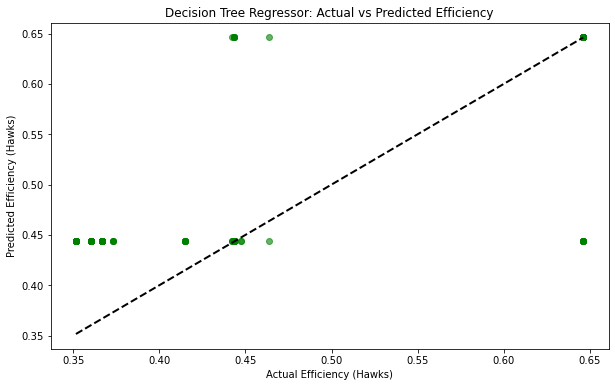

In [22]:
# Step 1: Predict the efficiency using the Decision Tree model on test data
y_pred_tree = tree_model.predict(X_test)

# Step 2: Create a scatter plot to compare actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tree, color='green', alpha=0.6)

# Step 3: Add a diagonal line to show the perfect predictions (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Step 4: Add labels and title
plt.xlabel('Actual Efficiency (Hawks)')
plt.ylabel('Predicted Efficiency (Hawks)')
plt.title('Decision Tree Regressor: Actual vs Predicted Efficiency')

# Step 5: Show the plot
plt.show()


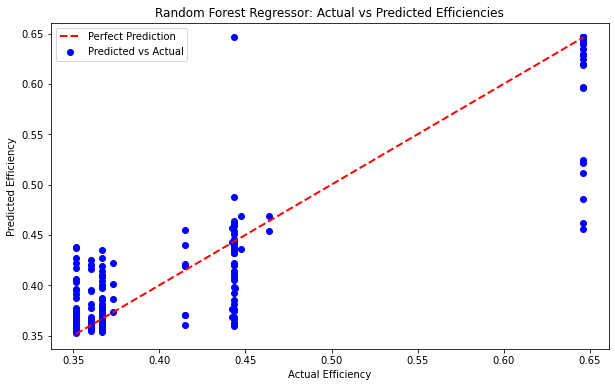

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Predict efficiencies using the Random Forest model
y_pred_forest = forest_model.predict(X_test_scaled)

# Step 2: Create a scatter plot of actual vs predicted efficiencies
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_forest, color='blue', label='Predicted vs Actual')

# Step 3: Plot the ideal line (perfect prediction line)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')

# Step 4: Add labels, title, and legend
plt.xlabel('Actual Efficiency')
plt.ylabel('Predicted Efficiency')
plt.title('Random Forest Regressor: Actual vs Predicted Efficiencies')
plt.legend()

# Step 5: Display the plot
plt.show()


In [24]:
from sklearn.model_selection import cross_val_score

# Number of folds
k = 5

# Evaluate Linear Regression using cross-validation
cv_scores_linear = cross_val_score(linear_model, X, y, cv=k, scoring='neg_mean_squared_error')
print(f'Linear Regression Cross-Validation MSE: {-cv_scores_linear.mean()}')

# Evaluate Decision Tree using cross-validation
cv_scores_tree = cross_val_score(tree_model, X, y, cv=k, scoring='neg_mean_squared_error')
print(f'Decision Tree Cross-Validation MSE: {-cv_scores_tree.mean()}')

# Evaluate Random Forest using cross-validation
cv_scores_forest = cross_val_score(forest_model, X, y, cv=k, scoring='neg_mean_squared_error')
print(f'Random Forest Cross-Validation MSE: {-cv_scores_forest.mean()}')


Linear Regression Cross-Validation MSE: 0.0026633866022776893
Decision Tree Cross-Validation MSE: 0.004077885558874216
Random Forest Cross-Validation MSE: 0.0025157437293403424


In [25]:
from sklearn.model_selection import cross_val_score

# Number of folds
k = 5

# Evaluate Linear Regression using cross-validation
cv_scores_linear = cross_val_score(linear_model, X, y, cv=k, scoring='neg_mean_squared_error')
print(f'Linear Regression Cross-Validation MSE: {-cv_scores_linear.mean()}')

# Evaluate Decision Tree using cross-validation
cv_scores_tree = cross_val_score(tree_model, X, y, cv=k, scoring='neg_mean_squared_error')
print(f'Decision Tree Cross-Validation MSE: {-cv_scores_tree.mean()}')

# Evaluate Random Forest using cross-validation
cv_scores_forest = cross_val_score(forest_model, X, y, cv=k, scoring='neg_mean_squared_error')
print(f'Random Forest Cross-Validation MSE: {-cv_scores_forest.mean()}')



Linear Regression Cross-Validation MSE: 0.0026633866022776893
Decision Tree Cross-Validation MSE: 0.004077885558874216
Random Forest Cross-Validation MSE: 0.0025157437293403424


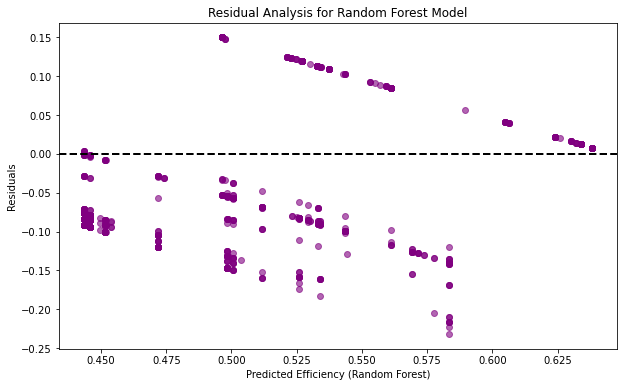

In [26]:
import matplotlib.pyplot as plt

# Calculate residuals for Random Forest (as an example)
y_pred_forest = forest_model.predict(X)
residuals = y - y_pred_forest

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_forest, residuals, alpha=0.6, color='purple')
plt.axhline(y=0, color='black', linestyle='--', lw=2)
plt.xlabel('Predicted Efficiency (Random Forest)')
plt.ylabel('Residuals')
plt.title('Residual Analysis for Random Forest Model')
plt.show()



In [27]:
# Calculate MSE for training data
y_pred_train_linear = linear_model.predict(X_train_scaled)
mse_train_linear = mean_squared_error(y_train, y_pred_train_linear)
print(f'Linear Regression Training MSE: {mse_train_linear}')

y_pred_train_tree = tree_model.predict(X_train_scaled)
mse_train_tree = mean_squared_error(y_train, y_pred_train_tree)
print(f'Decision Tree Training MSE: {mse_train_tree}')

y_pred_train_forest = forest_model.predict(X_train_scaled)
mse_train_forest = mean_squared_error(y_train, y_pred_train_forest)
print(f'Random Forest Training MSE: {mse_train_forest}')

# Compare with test MSE
print(f'Scaled Linear Regression Test MSE: {mse_linear_scaled}')
print(f'Scaled Decision Tree Test MSE: {mse_tree_scaled}')
print(f'Scaled Random Forest Test MSE: {mse_forest_scaled}')


Linear Regression Training MSE: 0.0022998626201664206
Decision Tree Training MSE: 3.2917359133713934e-05
Random Forest Training MSE: 0.00023895029217317013
Scaled Linear Regression Test MSE: 0.0025196475573289988
Scaled Decision Tree Test MSE: 0.0022283529223318644
Scaled Random Forest Test MSE: 0.0016630042868038424
